In [1]:
%matplotlib inline

In [2]:
import fns
from fns.functionsTFhardbound import *

/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


********************************************************************************
functionsTFhardbound loaded!
********************************************************************************


In [3]:
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
PAPER = os.path.expanduser('~/Dropbox/ICL-2014/Presentations/2016-10-11-GJ-sync-paper/figures/')

## Let the network find its steady state and connect

In [5]:
i = 0
params = []
for T in [16000]:
    for both in [False, True]:
        for N in [1000]:
            for sG in np.arange(0, 100, 10):
                for tauv in np.arange(15, 90, 10):
                    for k in [0, 100]:
                        i += 1
                        params.append([T, both, N, sG, tauv, i, k])

scaling = 1 / (1 / (2 * 2 / 0.25)) ** 0.5 * 70


df = pd.read_csv('gSteady.csv')

def runFnNoPlast(things):
    DEVICE = '/cpu:0'
    T, both, N, sG, tauv, i, k = things
    apple = generateInput2(2, T)
    pear = generateInput2(3, T)
    print('*' * 80)
    print('%d / %d' % (i, 160))
    ### input 1: apple
    gpu1 = TfConnEvolveNet(N=N, T=T, disp=False, tauv=tauv, sG=sG, device=DEVICE,
                 both=both, spikeMonitor=False, startPlast=999999)
    gpu1.input = apple*k
    gpu1.initWGap = True
    gpu1.disp = False
    gpu1.runTFSimul()

    ### input 2: pear
    gpu2 = TfConnEvolveNet(N=N, T=T, disp=False, tauv=tauv, sG=sG, device=DEVICE,
                 both=both, spikeMonitor=False, startPlast=99999)
    gpu2.input = pear*k
    gpu2.initWGap = True
    gpu2.disp = False
    gpu2.runTFSimul()

    filename = "MITestwii-both-%s_tauv-%d_sg-%d_N-%d_input-%s_T-%d_k-%d" % (str(both), tauv, sG, N, 'noise', T, k)
    with open(filename, 'wb') as f:
        np.savez(f, vvmN1=gpu1.vvmN1, vvmN2=gpu1.vvmN2, vvm=gpu1.vvm,
                 vvmN1_2=gpu2.vvmN1, vvmN2_2=gpu2.vvmN2, vvm_2=gpu2.vvm,
                 g1N1=gpu1.gammaN1, g1N2 = gpu1.gammaN2, g1=gpu1.gamma, g1s=gpu1.gammaNS,
                 g2N1=gpu2.gammaN1, g2N2=gpu2.gammaN2, g2=gpu2.gamma,  g2s=gpu2.gammaNS,
                i1N1=gpu1.i1, i1N2=gpu1.i2, i2N1=gpu2.i1, i2N2=gpu2.i2)
    del gpu1
    del gpu2
    gc.collect()

def runFnPlast(things):
    DEVICE = '/cpu:0'
    T, both, N, sG, tauv, i, k = things
    apple = generateInput2(2, T)
    pear = generateInput2(3, T)
    print('*' * 80)
    print('%d / %d' % (i,160))
    ### input 1: apple
    gpu1 = TfConnEvolveNet(N=N, T=T, disp=False, tauv=tauv, sG=sG, device=DEVICE,
                 both=both, spikeMonitor=False, startPlast=0)
    gpu1.input = apple*k
    gpu1.initWGap = True
    gpu1.disp = False
    gpu1.runTFSimul()

    ### input 2: pear
    gpu2 = TfConnEvolveNet(N=N, T=T, disp=False, tauv=tauv, sG=sG, device=DEVICE,
                 both=both, spikeMonitor=False, startPlast=0)
    gpu2.input = pear*k
    gpu2.initWGap = True
    gpu2.disp = False
    gpu2.runTFSimul()

    filename = "MITestPlastwii-both-%s_tauv-%d_sg-%d_N-%d_input-%s_T-%d_k-%d" % (str(both), tauv, sG, N, 'noise', T, k)
    with open(filename, 'wb') as f:
        np.savez(f, vvmN1=gpu1.vvmN1, vvmN2=gpu1.vvmN2, vvm=gpu1.vvm,
                 vvmN1_2=gpu2.vvmN1, vvmN2_2=gpu2.vvmN2, vvm_2=gpu2.vvm,
                 g1N1=gpu1.gammaN1, g1N2=gpu1.gammaN2, g1=gpu1.gamma,  g1s=gpu1.gammaNS,
                 g2N1=gpu2.gammaN1, g2N2=gpu2.gammaN2, g2=gpu2.gamma,  g2s=gpu2.gammaNS,
                 i1N1=gpu1.i1, i1N2=gpu1.i2, i2N1=gpu2.i1, i2N2=gpu2.i2)
    del gpu1
    del gpu2
    gc.collect()



# q = Pool(nodes=56)
# re = q.amap(runFnPlast, params)
# re.get()

# p = Pool(nodes=56)
# re = p.amap(runFnNoPlast, params)
# re.get()

In [11]:
df = pd.DataFrame(columns=('tauv', 'sG', 'both', 'T', 'N', 'k',
                           'corS_apple', 'corE_apple','corS_pear', 'corE_pear', 'corChange_apple', 'corChange_pear', 
                           'm1s', 'm1e','m2s', 'm2e', 'mChangeN1', 'mChangeN2',
                           'm1s_pear', 'm1e_pear', 'm2s_pear', 'm2e_pear', 'mChangeN1_pear', 'mChangeN2_pear',
                          'mBaseline_s', 'mBaseline_e', 'mBaseline_change',
                          'mBaseline_s_N2', 'mBaseline_e_N2', 'mBaseline_change_N2',
                          'mInter_s', 'mInter_e', 'mInter_change',
                          'mInput1_s', 'mInput1_e', 'mInput1_change',
                          'mInput2_s', 'mInput2_e', 'mInput2_change',
                          'm2s_avg', 'm2e_avg', 'mChangeN2_avg', 
                           'g1N1s', 'g1N1e', 'g1N1change',
                           'g1N2s', 'g1N2e', 'g1N2change', 
                           'mInter_changePlast', 'mInter_changeConn',
                           'f1Begin', 'p1Begin', 'f2Begin', 'p2Begin',
                            'f1End', 'p1End', 'f2End', 'p2End',
                            'maxBegin', 'argmaxBegin', 'maxEnd', 'argmaxEnd'
                          ) )
i=-1
d = 2000
d2 = 7000
start = 5900
s0 = 100
end = T
sigma = 8
for T in [16000]:
    apple = generateInput2(2, T)
    pear = generateInput2(3, T)
    for both in [ False]:
        for N in [1000]:
            for sG in np.arange(0, 100, 10):
                for tauv in np.arange(15, 90, 10):
                    for k in [0]:
#                     try:
                        i+=1
                        filename = "MITestPlast-both-%s_tauv-%d_sg-%d_N-%d_input-%s_T-%d_k-%d" % (str(both), tauv,sG, N, 'noise', T, k)
#                         filename = "MIEvolveNoPlast5-both-%s_tauv-%d_sg-%d_N-%d_input-%s_T-%d_k-%d" % (str(both), tauv,sG, N, 'noise', T, k)

                        a = np.load(filename)
    
                        i1 = a['i1N1']
                        i2 = a['i1N2']
            
                        _i1 = a['i2N1']
                        _i2 = a['i2N2']
            
                        cor1 = np.corrcoef(i1[start:start+d], i2[start:start+d])[0,1]
                        cor2 = np.corrcoef(i1[T-d:T], i2[T-d:T])[0,1]
                        cor1_2 = np.corrcoef(_i1[start:start+d], _i2[start:start+d])[0,1]
                        cor2_2 = np.corrcoef(_i1[T-d:T], _i2[T-d:T])[0,1]
                        corChange = cor2/cor1
                        corChange_2 = cor2_2/cor1_2
                        
                        f, Pxy = signal.csd(i1[s0:s0+d2], i2[s0:s0+d2], fs=1 / 0.00025, nperseg=2048)
                        f2, Pxy2 = signal.csd(i1[T-d2:T], i2[T-d2:T], fs=1 / 0.00025, nperseg=2048)

                        maxBegin = np.max(np.abs(Pxy))
                        argmaxBegin = np.argmax(np.abs(Pxy))
                        maxEnd = np.max(np.abs(Pxy2))
                        argmaxEnd = np.argmax(np.abs(Pxy2))


                        # compute frequency and power with fourier transform of the lfp (mean current)
                        f1Begin = fourier(i1[s0:s0+d2])[0]
                        p1Begin = fourier(i1[s0:s0+d2])[1]
                        
                        f2Begin = fourier(i2[s0:s0+d2])[0]
                        p2Begin = fourier(i2[s0:s0+d2])[1]
                        

                        f1End = fourier(i1[T-d2:T])[0]
                        p1End = fourier(i1[T-d2:T])[1]
                        
                        f2End = fourier(i2[T-d2:T])[0]
                        p2End = fourier(i2[T-d2:T])[1]
                        
                        g1N1s = np.mean(a['g1N1'][start//40:(start+d)//40])
                        g1N1e = np.mean(a['g1N1'][(T-d)//40:(T)//40])
                        g1N2s = np.mean(a['g1N2'][start//40:(start+d)//40])
                        g1N2e = np.mean(a['g1N2'][(T-d)//40:(T)//40])
                        
                        g1N1change = g1N1e/g1N1s
                        g1N2change = g1N2e/g1N2s

                        # m1x: MI between apple input and output network 1 with apple input
                        m1s = float(mutual_info.mutual_information_2d((apple[start:start+d]), (i1[start:start+d]), 
                                                                     normalized=False, sigma=sigma) )
                        m1e = float(mutual_info.mutual_information_2d((apple[T-d:T]), (i1[T-d:T]), 
                                                                    normalized=False, sigma=sigma))
                        # m2x: MI between apple input and output network 2 with apple input
                        m2s = float(mutual_info.mutual_information_2d((apple[start:start+d]), (i2[start:start+d]), 
                                                                     normalized=False, sigma=sigma) )
                        m2e = float(mutual_info.mutual_information_2d((apple[T-d:T]), (i2[T-d:T]), 
                                                                    normalized=False, sigma=sigma))
                        mChangeN1 = m1e/m1s
                        mChangeN2 = m2e/m2s
                        
                        # m1x_pear: MI between pear input and output network 1 with pear input
                        m1s_pear = float(mutual_info.mutual_information_2d((pear[start:start+d]), (_i1[start:start+d]), 
                                                                     normalized=False, sigma=sigma) )
                        m1e_pear = float(mutual_info.mutual_information_2d((pear[T-d:T]), (_i1[T-d:T]), 
                                                                    normalized=False, sigma=sigma))
                        # m2x_pear: MI between pear input and output network 2 with pear input
                        m2s_pear = float(mutual_info.mutual_information_2d((pear[start:start+d]), (_i2[start:start+d]), 
                                                                     normalized=False, sigma=sigma) )
                        m2e_pear = float(mutual_info.mutual_information_2d((pear[T-d:T]), (_i2[T-d:T]), 
                                                                    normalized=False, sigma=sigma))
                        mChangeN1_pear = m1e_pear/m1s_pear
                        mChangeN2_pear = m2e_pear/m2s_pear
                        
                        # m2x_pear+apple avg: MI between pear input and output network 2 with pear input
                        m2s_avg = (m2s+m2s_pear)/2
                        m2e_avg = (m2e+m2e_pear)/2
                        mChangeN2_avg = m2e_avg/m2s_avg

                        
                        
                        # mBaseline: MI between pear input and output network 1 with pear input
                        mBaseline_s = float(mutual_info.mutual_information_2d((apple[start:start+d]), (_i1[start:start+d]), 
                                                                     normalized=False, sigma=sigma) )
                        mBaseline_e = float(mutual_info.mutual_information_2d((apple[T-d:T]), (_i1[T-d:T]), 
                                                                    normalized=False, sigma=sigma))

                        mBaseline_change = mBaseline_e/mBaseline_s
                        
                        # mBaseline: MI between pear input and output network 1 with pear input
                        mBaseline_s_N2 = float(mutual_info.mutual_information_2d((apple[start:start+d]), (_i2[start:start+d]), 
                                                                     normalized=False, sigma=sigma) )
                        mBaseline_e_N2 = float(mutual_info.mutual_information_2d((apple[T-d:T]), (_i2[T-d:T]), 
                                                                    normalized=False, sigma=sigma))

                        mBaseline_change_N2 = mBaseline_e_N2/mBaseline_s_N2
                        
                        # mInter: inter coherence
#                         mInter_s0 = float(mutual_info.mutual_information_2d((i1[7000:7000+d]), (i2[start:start+d]), 
#                                                                      normalized=False, sigma=sigma) )
                        mInter_s0=0
                        mInter_s = float(mutual_info.mutual_information_2d((i1[start:start+d]), (i2[start:start+d]), 
                                                                     normalized=False, sigma=sigma) )
                        mInter_e = float(mutual_info.mutual_information_2d((i1[T-d:T]), (i2[T-d:T]), 
                                                                    normalized=False, sigma=sigma))

                        mInter_change = mInter_e/mInter_s
                        mInter_changePlast = (mInter_e - mInter_s)/(mInter_e - mInter_s0)
                        mInter_changeConn = (mInter_s - mInter_s0)/(mInter_e - mInter_s0)
                        
                        
                        # mInput: test coherence after presenting different inputs
                        mInput1_s = float(mutual_info.mutual_information_2d((i1[start:start+d]), (_i1[start:start+d]), 
                                                                     normalized=False, sigma=sigma) )
                        mInput1_e = float(mutual_info.mutual_information_2d((i1[T-d:T]), (_i1[T-d:T]), 
                                                                    normalized=False, sigma=sigma))

                        mInput1_change = mInput1_e/mInput1_s
                        
                        mInput2_s = float(mutual_info.mutual_information_2d((i2[start:start+d]), (_i2[start:start+d]), 
                                                                     normalized=False, sigma=sigma) )
                        mInput2_e = float(mutual_info.mutual_information_2d((i2[T-d:T]), (_i2[T-d:T]), 
                                                                    normalized=False, sigma=sigma))

                        mInput2_change = mInput2_e/mInput2_s

                        
    #                     df.loc[i] = [int(tauv), int(sG), bool(both), int(T), int(N), float(a['cor1']), float(a['cor2']) ]
                        df.loc[i] = [int(tauv), int(sG), bool(both), int(T), int(N), int(k),
                                     cor1, cor2, cor1_2, cor2_2,
                                     corChange, corChange_2, 
                                     m1s, m1e, m2s, m2e, mChangeN1, mChangeN2,
                                     m1s_pear, m1e_pear, m2s_pear, m2e_pear, mChangeN1_pear, mChangeN2_pear,
                                    mBaseline_s, mBaseline_e, mBaseline_change,
                                    mBaseline_s_N2, mBaseline_e_N2, mBaseline_change_N2,
                                    mInter_s, mInter_e, mInter_change,
                                    mInput1_s, mInput1_e, mInput1_change,
                                    mInput2_s, mInput2_e, mInput2_change,
                                    m2s_avg, m2e_avg, mChangeN2_avg, 
                                    g1N1s, g1N1e, g1N1change,
                                   g1N2s, g1N2e, g1N2change, 
                                    mInter_changePlast, mInter_changeConn,
                                    f1Begin, p1Begin, f2Begin, p2Begin,
                                    f1End, p1End, f2End, p2End,
                                    maxBegin, argmaxBegin, maxEnd, argmaxEnd]

In [12]:
df0 = df.copy()
df = df.drop_duplicates()

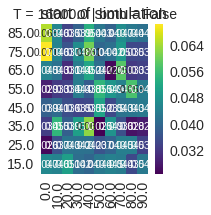

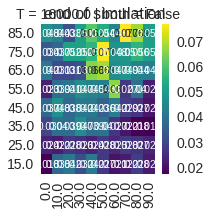

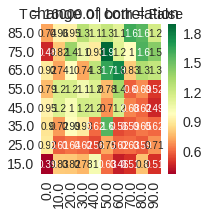

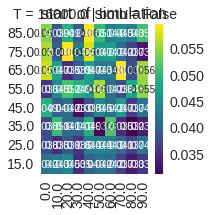

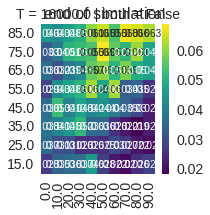

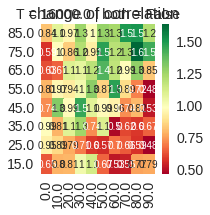

In [13]:
vmin = 0.4
vmax = 0.8
vminc = 0.8
vmaxc = 2.7
vmin, vmax, vminc, vmaxc = None,None,None,None

plotGrid(df, 'm2s', 'start of simulation', cmap="viridis", cols = ['m2s', 'm2e', 'mChangeN2'], vmin=vmin, vmax=vmax)
plotGrid(df, 'm2e', 'end of simulation', cmap="viridis", cols = ['m2s', 'm2e', 'mChangeN2'], vmin=vmin, vmax=vmax)
plotGrid(df, 'mChangeN2', 'change of correlation',  cmap="RdYlGn", 
         norm=MidpointNormalize(midpoint=1.), cols = ['m2s', 'm2e', 'mChangeN2'], vmin=vminc, vmax=vmaxc)

plotGrid(df, 'm2s_avg', 'start of simulation', cmap="viridis", cols = ['m2s_avg', 'm2e_avg', 'mChangeN2_avg'], vmin=vmin, vmax=vmax)
plotGrid(df, 'm2e_avg', 'end of simulation', cmap="viridis", cols = ['m2s_avg', 'm2e_avg', 'mChangeN2_avg'], vmin=vmin, vmax=vmax)
plotGrid(df, 'mChangeN2_avg', 'change of correlation',  cmap="RdYlGn", 
         norm=MidpointNormalize(midpoint=1.), cols = ['m2s_avg', 'm2e_avg', 'mChangeN2_avg'], vmin=vminc, vmax=vmaxc)

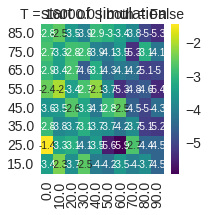

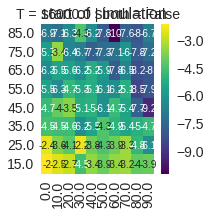

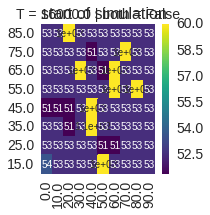

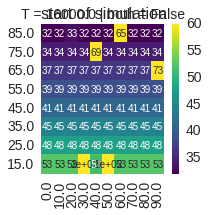

In [14]:
cols = ['p1Begin', 'p2Begin']
plotGrid(df, 'p1Begin', 'start of simulation', cmap="viridis", cols = cols, vmin=None, vmax=None)
plotGrid(df, 'p2Begin', 'start of simulation', cmap="viridis", cols = cols, vmin=None, vmax=None)

cols = ['f1Begin', 'f2Begin']
plotGrid(df, 'f1Begin', 'start of simulation', cmap="viridis", cols = cols, vmin=None, vmax=60)
plotGrid(df, 'f2Begin', 'start of simulation', cmap="viridis", cols = cols, vmin=None, vmax=60)

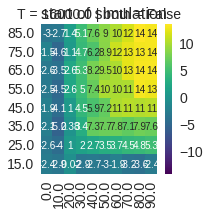

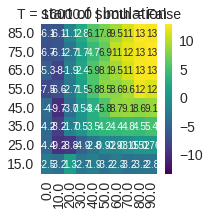

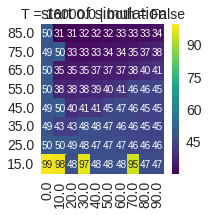

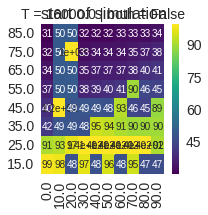

In [15]:
cols = ['p1End', 'p2End']
plotGrid(df, 'p1End', 'start of simulation', cmap="viridis", cols = cols, vmin=None, vmax=None)
plotGrid(df, 'p2End', 'start of simulation', cmap="viridis", cols = cols, vmin=None, vmax=None)

cols = ['f1End', 'f2End']
plotGrid(df, 'f1End', 'start of simulation', cmap="viridis", cols = cols, vmin=None, vmax=100)
plotGrid(df, 'f2End', 'start of simulation', cmap="viridis", cols = cols, vmin=None, vmax=100)

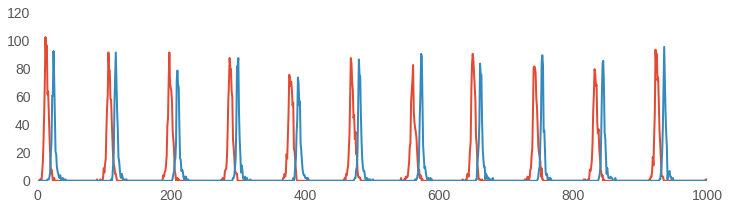

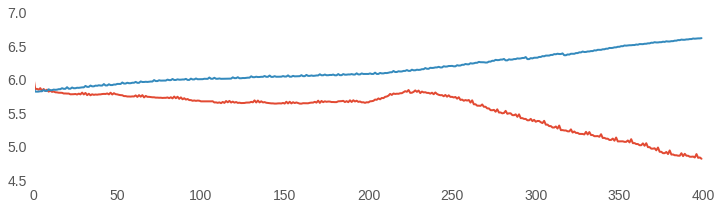

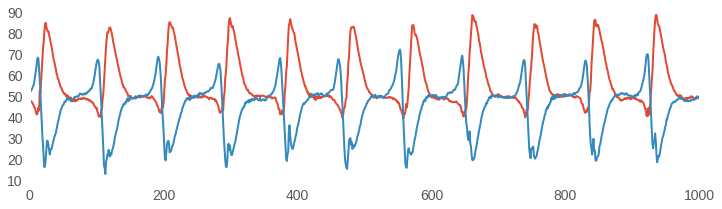

In [40]:
sG = 90
both = False
tauv = 65
T= 16000
N = 1000
k = 0
filename = "MITestPlastwii-both-%s_tauv-%d_sg-%d_N-%d_input-%s_T-%d_k-%d" % (str(both), tauv,sG, N, 'noise', T, k)
a = np.load(filename)
start = 15000
d = 1000
plt.figure(figsize=(12,3))
plt.plot(i1[start:start+d])
plt.plot(i2[start:start+d])
plt.figure(figsize=(12,3))

plt.plot(a['g1N1'])
plt.plot(a['g2N2'])
plt.figure(figsize=(12,3))

plt.plot(a['i1N1'][start:start+d])
plt.plot(a['i2N2'][start:start+d])

## Activity Phase Diagrams

In [7]:
i = 0
params = []
for T in [8000]:
        for N in [1000]:
            for g in np.arange(0, 15, 0.5):
                for nu in np.arange(0, 200, 5):
                        i += 1
                        params.append([T, N, g, nu, i])

scaling = 1 / (1 / (2 * 2 / 0.25)) ** 0.5 * 70

# 3->4: fix ratio g0 to 7

def runFnNoPlast(things):
    DEVICE = '/cpu:0'
    T, N, g, nu, i = things
    apple = generateInput2(2, T)
#     print('*' * 80)
#     print('%d / %d' % (i, 160))
    ### input 1: apple
    gpu1 = TfSingleNet(N=N, T=T, disp=False, tauv=15, nu=nu, g0=g, 
                       device=DEVICE, spikeMonitor=False, startPlast=999999)
    gpu1.input = apple*0
    gpu1.initWGap = False
    gpu1.runTFSimul()

    filename = "../data/PhasePlan5/PhasePlan5_nu-%d_g-%.2f_N-%d_input-%s_T-%d" % (nu, g, N, 'noise', T)
    with open(filename, 'wb') as f:
        np.savez(f, vvm=gpu1.vvm, i=gpu1.im, burst=gpu1.burstingActivity, spike=gpu1.spikingActivity)
    del gpu1
    gc.collect()

p = Pool(nodes=56)
re = p.amap(runFnNoPlast, params)
re.get()

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [4]:
# df = pd.DataFrame(columns=('nu', 'g', 'T', 'N', 'f', 'p', 'burst', 'spike', 'ratio'
#                           ) )
# i=-1
# d = 2000
# d2 = 7000
# start = 5900
# s0 = 100
# sigma = 8
# for T in [8000]:
#         for N in [1000]:
#             for g in np.arange(0, 15, 0.1):
#                 for nu in np.arange(0, 200, 1):
#                         i+=1
#                         filename = "PhasePlan3_nu-%d_g-%.2f_N-%d_input-%s_T-%d" % (nu, g, N, 'noise', T)
#                         a = np.load(filename)
#                         I = a['i']

#                         # compute frequency and power with fourier transform of the lfp (mean current)
#                         f = fourier(I[10:])[0]
#                         p = fourier(I[10:])[1]

#                         df.loc[i] = [int(nu), g, int(T), int(N), f, p, 
#                                      float(a['burst']), float(a['spike']), (a['burst']/a['spike'])]

In [11]:
df = pd.DataFrame(columns=('nu', 'g', 'T', 'N', 'f', 'p', 'burst', 'spike', 'ratio'
                          ) )
i=-1
d = 2000
d2 = 7000
start = 5900
s0 = 100
sigma = 8
params=[]
for T in [8000]:
        for N in [1000]:
            for g in np.arange(0, 15, 0.5):
                for nu in np.arange(0, 200, 5):
                        i+=1
                        params.append([T, N, g, nu, i])

def getDF(params):
    T, N, g, nu, i = params
    filename = "../data/PhasePlan5/PhasePlan5_nu-%d_g-%.2f_N-%d_input-%s_T-%d" % (nu, g, N, 'noise', T)
    a = np.load(filename)
    I = a['i']

    # compute frequency and power with fourier transform of the lfp (mean current)
    f = fourier(I[10:])[0]
    p = fourier(I[10:])[1]

    return [i, int(nu), g, int(T), int(N), f, p, 
                 float(a['burst']), float(a['spike']), (a['burst']/a['spike'])]
    
q = Pool(nodes=56)
re = q.amap(getDF, params)
res = re.get()
for r in res:
    df.loc[r[0]]=r[1:]

In [12]:
# res

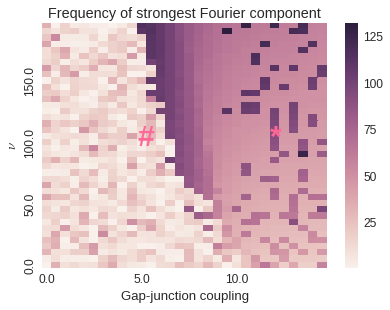

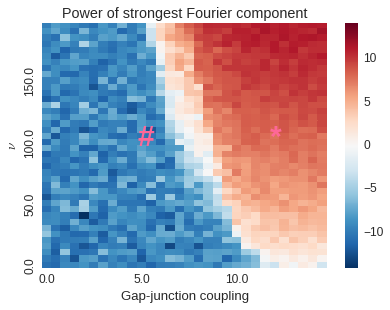

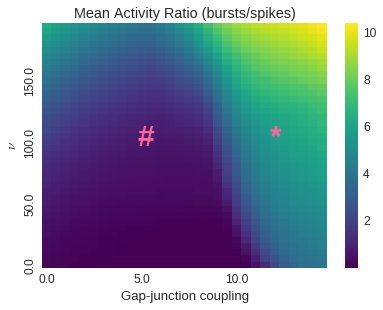

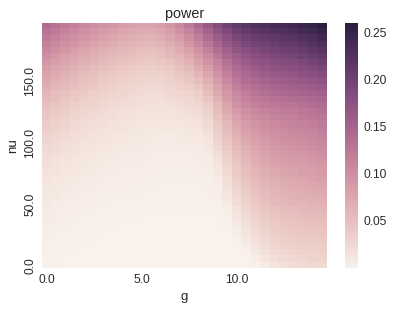

In [13]:
cols = ['f', 'p']
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})

# df = df_[(df_['g']<3)&(df_['nu']<20)]
def setLabels(fig):
    color = '#FF6898'
    fig.text(5*2, 20, '#', fontweight='bold', fontsize=30, color=color)
    fig.text(12*2, 20, '*', fontweight='bold', fontsize=30, color=color)
    fig.set_ylabel(r'$\nu$')
    fig.set_xlabel(r'Gap-junction coupling')
    
    

fig = plotHeatmap(df, col='f', y='nu', x='g', title='Frequency of strongest Fourier component')
setLabels(fig)
plt.savefig(PAPER + 'frequency.svg')

fig = plotHeatmap(df, col='p', y='nu', x='g', title='Power of strongest Fourier component')
setLabels(fig)
plt.savefig(PAPER + 'power.svg')

fig = plotHeatmap(df, col='ratio', y='nu', x='g', title='Mean Activity Ratio (bursts/spikes)', cmap='viridis')
setLabels(fig)
plt.savefig(PAPER + 'ratio.svg')
plotHeatmap(df, col='burst', y='nu', x='g', title='power')

In [15]:
df[df['nu']==100]

,nu,g,T,N,f,p,burst,spike,ratio
20,100.0,0.0,8000.0,1000.0,19.014258,-10.996376,0.028322,0.015385,1.840929
60,100.0,0.5,8000.0,1000.0,5.003752,-8.010653,0.024634,0.014970,1.645602
100,100.0,1.0,8000.0,1000.0,18.013508,-9.892727,0.021208,0.014589,1.453690
140,100.0,1.5,8000.0,1000.0,3.002251,-9.248868,0.018679,0.014213,1.314237
180,100.0,2.0,8000.0,1000.0,10.007504,-7.353106,0.016307,0.013847,1.177715
220,100.0,2.5,8000.0,1000.0,3.002251,-8.828474,0.014418,0.013502,1.067899
260,100.0,3.0,8000.0,1000.0,11.008255,-7.191382,0.012837,0.013155,0.975827
300,100.0,3.5,8000.0,1000.0,14.010506,-7.142781,0.011481,0.012821,0.895510
340,100.0,4.0,8000.0,1000.0,18.013508,-9.271971,0.010138,0.012490,0.811691
380,100.0,4.5,8000.0,1000.0,12.009005,-8.556871,0.009289,0.012191,0.761937


In [4]:
DEVICE = '/gpu:0'

T=1100
g=5
### input 1: apple
nu = 100
gpu1 = TfSingleNet(N=1000, T=T, disp=False, tauv=15, nu=nu, g0=g, 
                   device=DEVICE, spikeMonitor=True, startPlast=999999)
gpu1.input = np.ones(T)*0
gpu1.initWGap = False
gpu1.dt=0.1
gpu1.startPlast=0
gpu1.runTFSimul()

8.42


In [5]:
T=1100
g=10
### input 1: apple
nu = 100
gpu2 = TfSingleNet(N=1000, T=T, disp=False, tauv=15, nu=nu, g0=g,
                   device=DEVICE, spikeMonitor=True, startPlast=999999)
gpu2.input = np.ones(T)*0
gpu2.initWGap = False
gpu2.dt=0.1
gpu2.startPlast=0
gpu2.runTFSimul()

# plt.imshow(gpu1.raster.T)
# plt.savefig('raster.pdf')

# filename = "raster_nu-%d_g-%d_N-%d_input-%s_T-%d" % (nu, g, N, 'raster', T)
# with open(filename, 'wb') as f:
#     np.savez(f, vvm=gpu1.vvm, i=gpu1.im, spikes=gpu1.spikes, burst=gpu1.burstingActivity, spike=gpu1.spikingActivity)
# del gpu1
# gc.collect()

7.82


In [6]:
def convertRaster(r):
    T = r.shape[1]
    x,y = [],[]
    for i in range(T):
        yi = np.ravel(np.where(r[:,i]==1)).tolist()
        y.append(yi)
        x.append(np.ones(len(yi))*i)
    x = np.concatenate(x)
    y = np.concatenate(y)
    return x,y

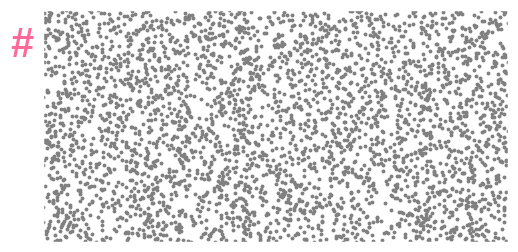

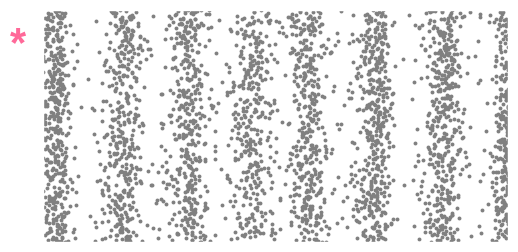

In [18]:

# plt.style.use(['seaborn-white','seaborn-paper', 'ggplot'])
# sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})

def setLabels(ax):
    ax.set_yticks([])
    ax.set_xticks([])
    
    
color = '#FF6898'
a = 6
b = 3
r = gpu1.raster[400:1400].transpose()
x,y = convertRaster(r)
aspect = b/a
fig  = plt.figure(figsize=(a,b))
ax = fig.add_subplot(111)
# ax.imshow(gpu1.raster[100:1100].transpose(), aspect=aspect)
ax.plot(x,y, '.', color='grey')
setLabels(ax)
ax.text(-50, 800, '#', fontweight='bold', fontsize=30, color=color)
plt.gca().invert_yaxis()
plt.ylim([0,1000])
# plt.tight_layout()
plt.savefig(PAPER + 'raster-AS.eps', transparent=True)

r = gpu2.raster[400:1400].transpose()
x,y = convertRaster(r)
aspect = b/a
fig  = plt.figure(figsize=(a,b))
ax = fig.add_subplot(111)
# ax.imshow(gpu1.raster[100:1100].transpose(), aspect=aspect)
ax.plot(x,y, '.', color='grey')
setLabels(ax)
ax.text(-50, 800, '*', fontweight='bold', fontsize=30, color=color)
plt.gca().invert_yaxis()
plt.ylim([0,1000])
# plt.tight_layout()
plt.savefig(PAPER + 'raster-S.eps', transparent=True)

In [38]:
# plt.style.use(['seaborn-white','seaborn-paper', 'ggplot'])
# sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})



# def setLabels(ax):
#     ax.set_yticks([])
#     ax.set_xticks([])
    
    
# color = '#FF6898'
# a = 5
# b = 3
# aspect = b/a
# fig  = plt.figure(figsize=(a,b))
# ax = fig.add_subplot(111)

# spikes = gpu1.raster[100:1100].transpose()
# y = np.concatenate([spikes[i,:]*(i+1) for i in range(spikes.shape[0])])
# x = list(np.arange(spikes.shape[1]))*spikes.shape[0]
# ax.plot(x,y, '.')
# setLabels(ax)
# ax.text(-50, 400, '#', fontweight='bold', fontsize=30, color=color)
# plt.gca().invert_yaxis()
# plt.ylim([0,600])
# plt.tight_layout()
# # plt.tight_layout()
# plt.savefig(PAPER + 'raster-AS.svg')

# # fig  = plt.figure(figsize=(a,b))
# # ax = fig.add_subplot(111)
# # ax.imshow(gpu2.raster[100:1100].transpose(), aspect=aspect)
# # setLabels(ax)
# # ax.text(-50, 400, '*', fontweight='bold', fontsize=30, color=color)
# # plt.gca().invert_yaxis()
# # plt.ylim([0,600])
# # plt.tight_layout()

# # plt.tight_layout()
# # plt.savefig(PAPER + 'raster-S.svg')

In [7]:
fourier(gpu2.vvm[100:])

[47.808764940239044, -43.811645135404746]

## FIG1

In [34]:
fig = sg.SVGFigure("16cm", "10cm")
# load matpotlib-generated figures
fig1 = sg.fromfile(PAPER + '/frequency.svg') #/2016-09-29-MakePhaseDiagramsWithTF.ipynb
fig2 = sg.fromfile(PAPER + '/power.svg') #/2016-09-29-MakePhaseDiagramsWithTF.ipynb
fig3 = sg.fromfile(PAPER + '/ratio.svg') #/2016-09-29-MakePhaseDiagramsWithTF.ipynb
fig4 = sg.fromfile(PAPER + 'coupling.svg')  # figure1D-coupling.ipynb
fig5 = sg.fromfile(PAPER + 'circuit.svg')  # drawing
fig6 = sg.fromfile(PAPER + 'resonance.svg') # figure1-resonant-property.ipynb
fig7 = sg.fromfile(PAPER + 'raster-AS.svg') # /2016-09-29-MakePhaseDiagramsWithTF.ipynb
fig8 = sg.fromfile(PAPER + 'raster-S.svg') # /2016-09-29-MakePhaseDiagramsWithTF.ipynb



# get the plot objects
scale = 0.45
plot1 = fig1.getroot()
plot1.moveto(0,10,scale= scale)

plot2 = fig2.getroot()
plot2.moveto(180, 10, scale = scale)

plot3 = fig3.getroot()
plot3.moveto(360, 10, scale = scale)

plot4 = fig4.getroot()
plot4.moveto(20,160, scale = scale)

plot5 = fig5.getroot()
plot5.moveto(145,185, scale = scale)

plot6 = fig6.getroot()
plot6.moveto(180,160, scale = scale)

plot7 = fig7.getroot()
plot7.moveto(400,170, scale = 0.3)

plot8 = fig8.getroot()
plot8.moveto(400,220, scale = 0.3)




# add text labels
w = "normal"
txt1 = sg.TextElement(5,20, "A", size=12, weight=w)
txt2 = sg.TextElement(190,20, "B", size=12, weight=w)
txt3 = sg.TextElement(370,20, "C", size=12, weight=w)
# txt4 = sg.TextElement(390,190, "#", size=12, weight=w)

# txt5 = sg.TextElement(390,240, "*", size=12, weight=w)
txt6 = sg.TextElement(370,165, "F", size=12, weight=w)
txt7 = sg.TextElement(190,165, "E", size=12, weight=w)
txt8 = sg.TextElement(5,165, "D", size=12, weight=w)
# append plots and labels to figure
fig.append([plot1, plot2, plot3, plot4, plot5, plot6, plot7, plot8])
fig.append([txt1, txt2, txt3, txt4, txt5, txt6, txt7, txt8])
# save generated SVG files
fig.save(PAPER + "fig1.svg")
svg2pdf('fig1',PAPER) 




In [35]:
def svg2png(filename, path = '/Users/GP1514/Dropbox/0000_PhD/figures/20160704/'):
    subprocess.check_output(["inkscape", '%s%s.svg'%(path, filename),
                            '-e', '%s%s.png'%(path,filename), '--without-gui',
                             '--export-ignore-filters','--export-png', '-d 300'])
    
svg2png('fig1',PAPER) 

## FIG2

## force power in subnet to see switch

In [16]:
i = 0
params = []
for T in [16000]:
    for both in [False]:
        for N in [1000]:
            for sG in np.arange(0, 100, 5):
                for tauv in np.arange(15, 90, 15):
                    for k in [0]:
                        i += 1
                        params.append([T, both, N, sG, tauv, i, k])

scaling = 1 / (1 / (2 * 2 / 0.25)) ** 0.5 * 70


df = pd.read_csv('gSteady.csv')

def runFnNoPlast(things):
    DEVICE = '/cpu:0'
    T, both, N, sG, tauv, i, k = things
    apple = generateInput2(2, T)
    pear = generateInput2(3, T)
    print('*' * 80)
    print('%d / %d' % (i, 160))
    ### input 1: apple
    gpu1 = TfConnEvolveNet(N=N, T=T, disp=False, tauv=tauv, sG=sG, device=DEVICE,
                 both=both, spikeMonitor=False, startPlast=8000)
    gpu1.input = apple*k
    gpu1.connectTime = 8000
    gpu1.FACT = 10**(-10)
    gpu1.initWGap = -1
    gpu1.g1 = 4.5
    gpu1.g2 = 3.5
    gpu1.disp = False
    
    gpu1.runTFSimul()
    

    filename = "Switch41-both-%s_tauv-%d_sg-%d_N-%d_input-%s_T-%d_k-%d" % (str(both), tauv, sG, N, 'noise', T, k)
    with open(filename, 'wb') as f:
        np.savez(f, vvmN1=gpu1.vvmN1, vvmN2=gpu1.vvmN2, vvm=gpu1.vvm,
                 g1N1=gpu1.gammaN1, g1N2 = gpu1.gammaN2, g1=gpu1.gamma, g1s=gpu1.gammaNS,
                 i1N1=gpu1.i1, i1N2=gpu1.i2, )
    del gpu1
    gc.collect()

p = Pool(nodes=56)
re = p.amap(runFnNoPlast, params)
re.get()

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [17]:
i = 0
params = []
for T in [16000]:
    for both in [False]:
        for N in [1000]:
            for sG in np.arange(0, 100, 5):
                for tauv in np.arange(15, 90, 15):
                    for k in [0]:
                        i += 1
                        params.append([T, both, N, sG, tauv, i, k])

scaling = 1 / (1 / (2 * 2 / 0.25)) ** 0.5 * 70


df = pd.read_csv('gSteady.csv')

def runFnNoPlast(things):
    DEVICE = '/cpu:0'
    T, both, N, sG, tauv, i, k = things
    apple = generateInput2(2, T)
    pear = generateInput2(3, T)
    print('*' * 80)
    print('%d / %d' % (i, 160))
    ### input 1: apple
    gpu1 = TfConnEvolveNet(N=N, T=T, disp=False, tauv=tauv, sG=sG, device=DEVICE,
                 both=both, spikeMonitor=False, startPlast=8000)
    gpu1.input = apple*k
    gpu1.connectTime = 8000
    gpu1.FACT = 10**(-10)
    gpu1.initWGap = -1
    gpu1.g1 = 3.5
    gpu1.g2 = 4.5
    gpu1.disp = False
    
    gpu1.runTFSimul()
    

    filename = "Switch51-both-%s_tauv-%d_sg-%d_N-%d_input-%s_T-%d_k-%d" % (str(both), tauv, sG, N, 'noise', T, k)
    with open(filename, 'wb') as f:
        np.savez(f, vvmN1=gpu1.vvmN1, vvmN2=gpu1.vvmN2, vvm=gpu1.vvm,
                 g1N1=gpu1.gammaN1, g1N2 = gpu1.gammaN2, g1=gpu1.gamma, g1s=gpu1.gammaNS,
                 i1N1=gpu1.i1, i1N2=gpu1.i2, )
    del gpu1
    gc.collect()

p = Pool(nodes=56)
re = p.amap(runFnNoPlast, params)
re.get()

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [3]:
df = pd.DataFrame(columns=('tauv', 'sG', 'both', 'T', 'N', 'k',
                           'corS_apple', 'corE_apple', 'corChange_apple', 
                           'f1Begin', 'p1Begin', 'f2Begin', 'p2Begin',
                            'f1End', 'p1End', 'f2End', 'p2End',
                            'maxBegin', 'argmaxBegin', 'maxEnd', 'argmaxEnd'
                          ) )
i=-1

s0 = 0
T = 16000
d2 = 2000-s0
end = T
sigma = 8
for T in [16000]:
    for both in [False]:
        for N in [1000]:
            for sG in np.arange(0, 100, 5):
                for tauv in np.arange(15, 90, 15):
                    for k in [0]:
#                     try:
                        i+=1
                        filename = "Switch41-both-%s_tauv-%d_sg-%d_N-%d_input-%s_T-%d_k-%d" % (str(both), tauv, sG, N, 'noise', T, k)
                        a = np.load(filename)
    
                        i1 = a['i1N1']
                        i2 = a['i1N2']
                        v1 = a['vvmN1']
                        v2 = a['vvmN2']
            
                        cor1 = np.corrcoef(i1[s0:s0+d2], i2[s0:s0+d2])[0,1]
                        cor2 = np.corrcoef(i1[T-d2:T], i2[T-d2:T])[0,1]

                        corChange = cor2/cor1

                        
                        f, Pxy = signal.csd(i1[s0:s0+d2], i2[s0:s0+d2], fs=1 / 0.00025, nperseg=1024)
                        f2, Pxy2 = signal.csd(i1[T-d2:T], i2[T-d2:T], fs=1 / 0.00025, nperseg=1024)

                        maxBegin = np.max(np.abs(Pxy))
                        argmaxBegin = np.argmax(np.abs(Pxy))
                        maxEnd = np.max(np.abs(Pxy2))
                        argmaxEnd = np.argmax(np.abs(Pxy2))


                        # compute frequency and power with fourier transform of the lfp (mean current)
#                         f1Begin = fourier(i1[s0:s0+d2])[0]
#                         p1Begin = fourier(i1[s0:s0+d2])[1]
                        
#                         f2Begin = fourier(i2[s0:s0+d2])[0]
#                         p2Begin = fourier(i2[s0:s0+d2])[1]
                        

#                         f1End = fourier(i1[T-d2:T])[0]
#                         p1End = fourier(i1[T-d2:T])[1]
                        
#                         f2End = fourier(i2[T-d2:T])[0]
#                         p2End = fourier(i2[T-d2:T])[1]

                        f1Begin = fourier(v1[s0:s0+d2])[0]
#                         f1Begin = fourier(movingaverage(v1[s0:s0+d2],10))[0]
                        p1Begin = fourier(i1[s0:s0+d2])[1]
                        
                        f2Begin = fourier(v2[s0:s0+d2])[0]
#                         f2Begin = fourier(movingaverage(v2[s0:s0+d2],10))[0]
                        p2Begin = fourier(i2[s0:s0+d2])[1]
                        

                        f1End = fourier(v1[T-d2:T])[0]
#                         f1End = fourier(movingaverage(v1[T-d2:T],10))[0]
                        p1End = fourier(i1[T-d2:T])[1]
                        
                        f2End = fourier(v2[T-d2:T])[0]
#                         f1End = fourier(movingaverage(v2[T-d2:T],10))[0]
                        p2End = fourier(i2[T-d2:T])[1]
                        
                        
    #                     df.loc[i] = [int(tauv), int(sG), bool(both), int(T), int(N), float(a['cor1']), float(a['cor2']) ]
                        df.loc[i] = [int(tauv), int(sG), bool(both), int(T), int(N), int(k),
                                     cor1, cor2, 
                                     corChange,
                                    f1Begin, p1Begin, f2Begin, p2Begin,
                                    f1End, p1End, f2End, p2End,
                                    maxBegin, argmaxBegin, maxEnd, argmaxEnd]

In [4]:
def plotGrid(df, col, title='', cols=['cor1', 'cor2', 'corChange'], **kws):
    data = pd.melt(df, id_vars=['tauv', 'sG', 'T', 'both'], value_vars=cols)

    with sns.plotting_context(font_scale=5.5):
        g = sns.FacetGrid(data, col="both", row="T", size=6, aspect=2)
    g = g.map_dataframe(facet_heatmap2, col=col, cols=cols,  **kws)

    plt.subplots_adjust(top=0.9)
    g.fig.suptitle(title, fontsize='16')
    g.savefig(DIRECTORY + 'cor-plot_%s.png' % col)

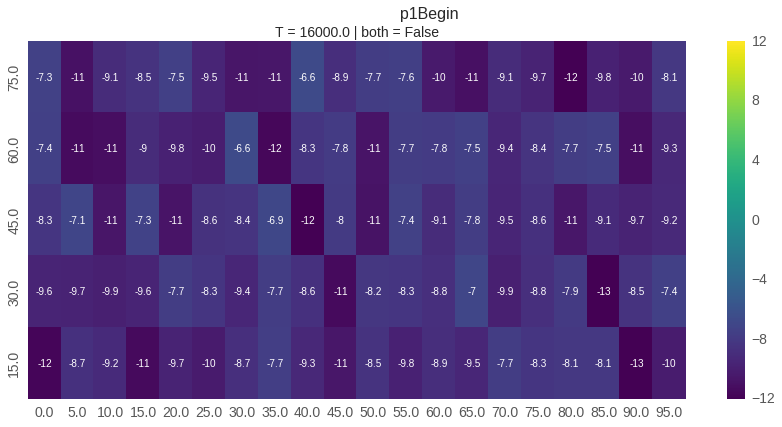

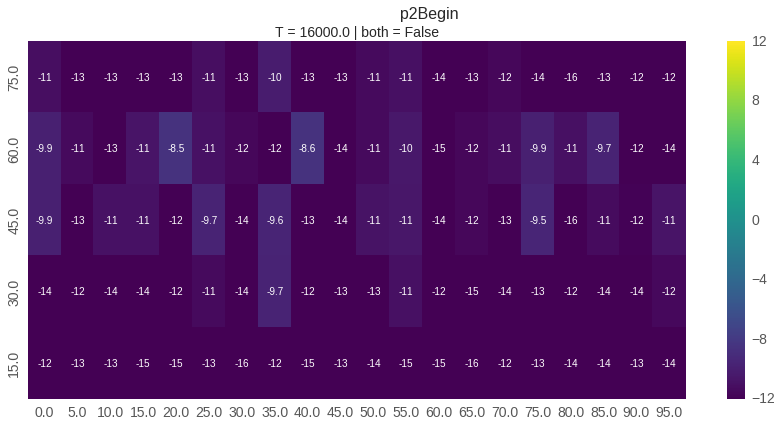

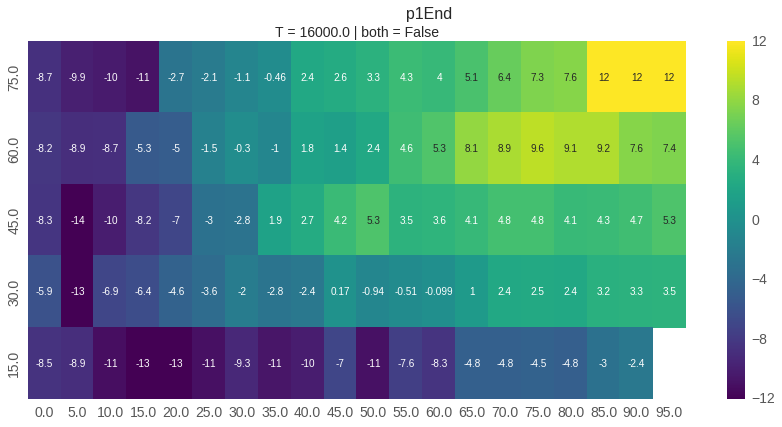

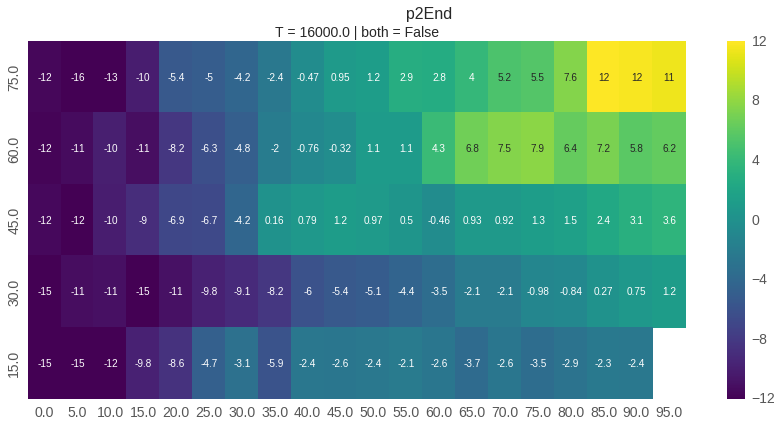

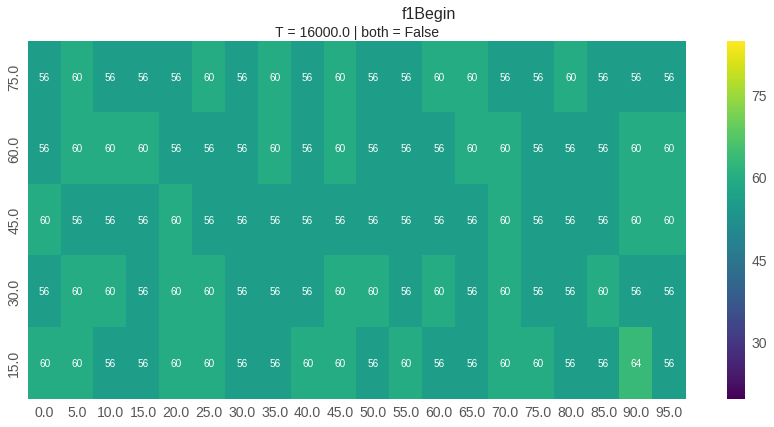

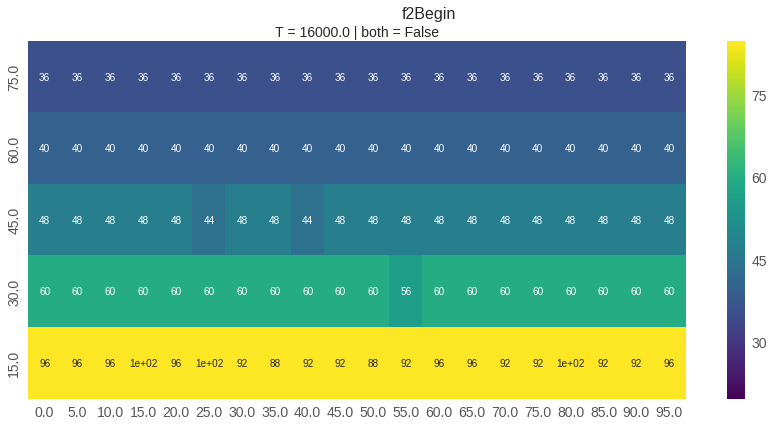

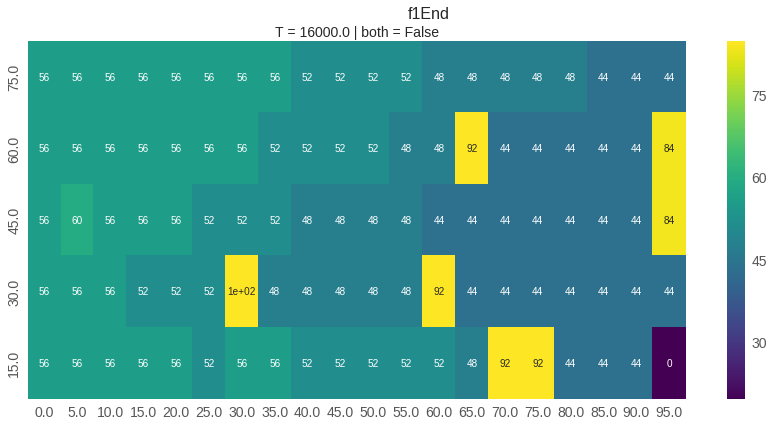

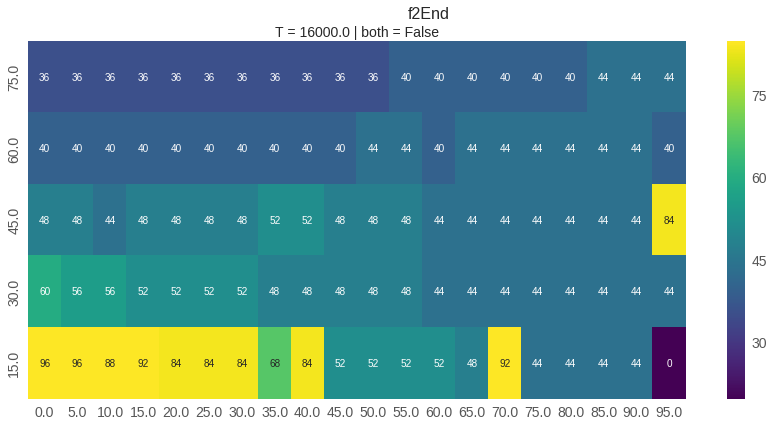

In [5]:

# sns.set_context("notebook", rc={'figure.figsize': (15,15)})
cols = ['p1Begin', 'p2Begin']
plotGrid(df, 'p1Begin', 'p1Begin', cmap="viridis", cols = cols, vmin=-12, vmax=12)
plotGrid(df, 'p2Begin', 'p2Begin',cmap="viridis", cols = cols, vmin=-12, vmax=12)


cols = ['p1End', 'p2End']
plotGrid(df, 'p1End', 'p1End', cmap="viridis", cols = cols, vmin=-12, vmax=12)
plotGrid(df, 'p2End', 'p2End',cmap="viridis", cols = cols, vmin=-12, vmax=12)


cols = ['f1Begin', 'f2Begin']
plotGrid(df, 'f1Begin', 'f1Begin',cmap="viridis", cols = cols, vmin=20, vmax=85)
plotGrid(df, 'f2Begin', 'f2Begin',cmap="viridis", cols = cols, vmin=20, vmax=85)

cols = ['f1End', 'f2End']
plotGrid(df, 'f1End', 'f1End',cmap="viridis", cols = cols, vmin=20, vmax=85)
plotGrid(df, 'f2End', 'f2End',cmap="viridis", cols = cols, vmin=20, vmax=85)

In [6]:
df = pd.DataFrame(columns=('tauv', 'sG', 'both', 'T', 'N', 'k',
                           'corS_apple', 'corE_apple', 'corChange_apple', 
                           'f1Begin2', 'p1Begin2', 'f2Begin2', 'p2Begin2',
                            'f1End2', 'p1End2', 'f2End2', 'p2End2', 
                            'maxBegin', 'argmaxBegin', 'maxEnd', 'argmaxEnd'
                          ) )
i=-1

s0 = 0
T = 16000
d2 = 2000-s0
end = T
sigma = 8
for T in [16000]:
    for both in [False]:
        for N in [1000]:
            for sG in np.arange(0, 100, 5):
                for tauv in np.arange(15, 90, 15):
                    for k in [0]:
#                     try:
                        i+=1
                        filename = "Switch51-both-%s_tauv-%d_sg-%d_N-%d_input-%s_T-%d_k-%d" % (str(both), tauv, sG, N, 'noise', T, k)
                        a = np.load(filename)
    
                        i1 = a['i1N1']
                        i2 = a['i1N2']
                        v1 = a['vvmN1']
                        v2 = a['vvmN2']
            
                        cor1 = np.corrcoef(i1[s0:s0+d2], i2[s0:s0+d2])[0,1]
                        cor2 = np.corrcoef(i1[T-d2:T], i2[T-d2:T])[0,1]

                        corChange = cor2/cor1

                        
                        f, Pxy = signal.csd(i1[s0:s0+d2], i2[s0:s0+d2], fs=1 / 0.00025, nperseg=1024)
                        f2, Pxy2 = signal.csd(i1[T-d2:T], i2[T-d2:T], fs=1 / 0.00025, nperseg=1024)

                        maxBegin = np.max(np.abs(Pxy))
                        argmaxBegin = np.argmax(np.abs(Pxy))
                        maxEnd = np.max(np.abs(Pxy2))
                        argmaxEnd = np.argmax(np.abs(Pxy2))


                        # compute frequency and power with fourier transform of the lfp (mean current)
#                         f1Begin = fourier(i1[s0:s0+d2])[0]
#                         p1Begin = fourier(i1[s0:s0+d2])[1]
                        
#                         f2Begin = fourier(i2[s0:s0+d2])[0]
#                         p2Begin = fourier(i2[s0:s0+d2])[1]
                        

#                         f1End = fourier(i1[T-d2:T])[0]
#                         p1End = fourier(i1[T-d2:T])[1]
                        
#                         f2End = fourier(i2[T-d2:T])[0]
#                         p2End = fourier(i2[T-d2:T])[1]

                        f1Begin = fourier(v1[s0:s0+d2])[0]
#                         f1Begin = fourier(movingaverage(v1[s0:s0+d2],10))[0]
                        p1Begin = fourier(i1[s0:s0+d2])[1]
                        
                        f2Begin = fourier(v2[s0:s0+d2])[0]
#                         f2Begin = fourier(movingaverage(v2[s0:s0+d2],10))[0]
                        p2Begin = fourier(i2[s0:s0+d2])[1]
                        

                        f1End = fourier(v1[T-d2:T])[0]
#                         f1End = fourier(movingaverage(v1[T-d2:T],10))[0]
                        p1End = fourier(i1[T-d2:T])[1]
                        
                        f2End = fourier(v2[T-d2:T])[0]
#                         f1End = fourier(movingaverage(v2[T-d2:T],10))[0]
                        p2End = fourier(i2[T-d2:T])[1]
                        
                        
    #                     df.loc[i] = [int(tauv), int(sG), bool(both), int(T), int(N), float(a['cor1']), float(a['cor2']) ]
                        df.loc[i] = [int(tauv), int(sG), bool(both), int(T), int(N), int(k),
                                     cor1, cor2, 
                                     corChange,
                                    f1Begin, p1Begin, f2Begin, p2Begin,
                                    f1End, p1End, f2End, p2End,
                                    maxBegin, argmaxBegin, maxEnd, argmaxEnd]

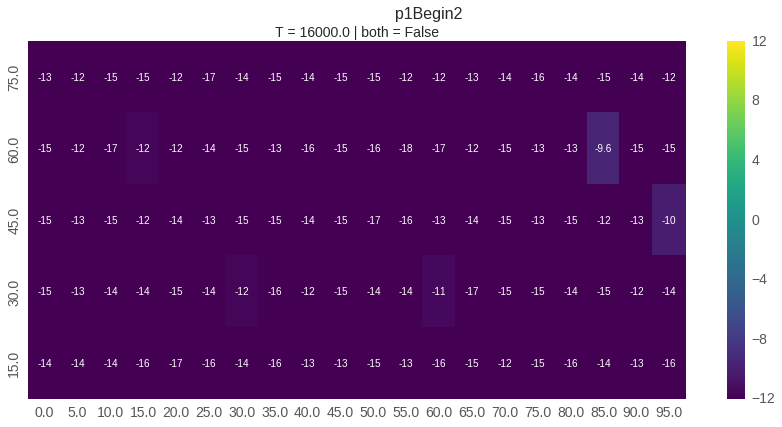

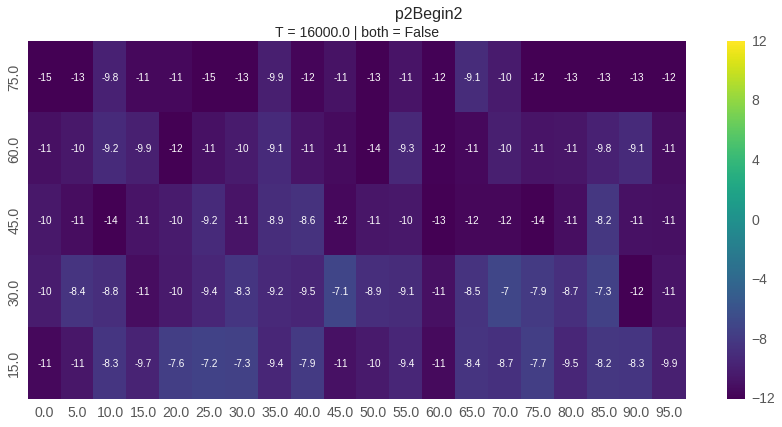

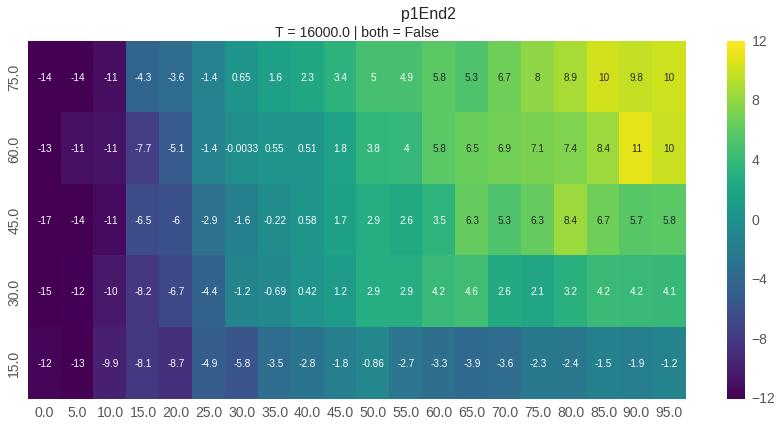

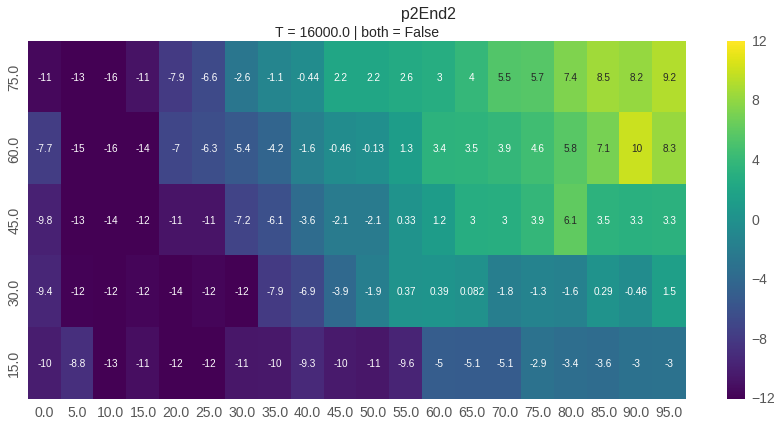

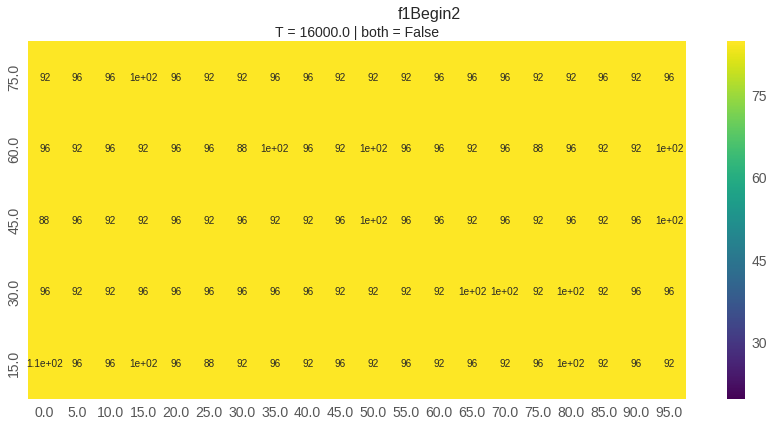

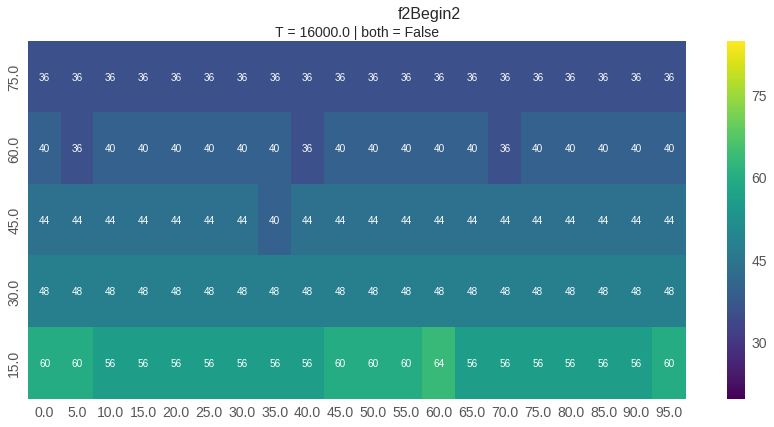

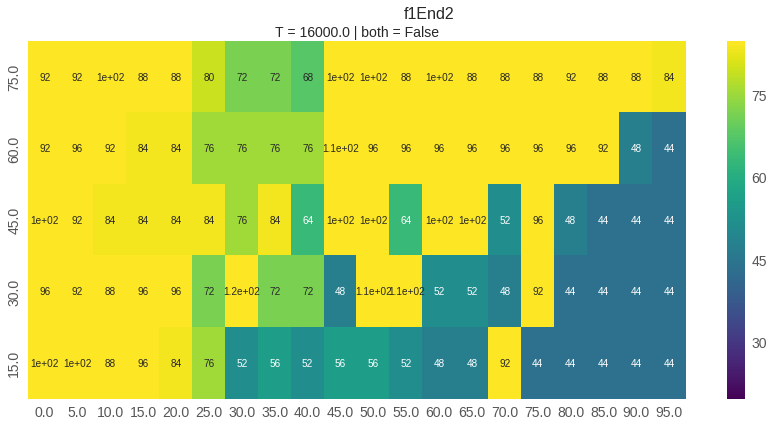

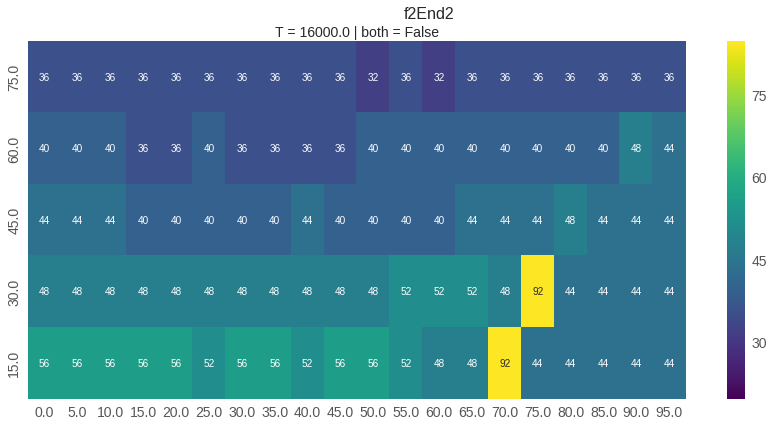

In [7]:

# sns.set_context("notebook", rc={'figure.figsize': (15,15)})
cols = ['p1Begin2', 'p2Begin2']
plotGrid(df, 'p1Begin2', 'p1Begin2', cmap="viridis", cols = cols, vmin=-12, vmax=12)
plotGrid(df, 'p2Begin2', 'p2Begin2',cmap="viridis", cols = cols, vmin=-12, vmax=12)


cols = ['p1End2', 'p2End2']
plotGrid(df, 'p1End2', 'p1End2', cmap="viridis", cols = cols, vmin=-12, vmax=12)
plotGrid(df, 'p2End2', 'p2End2',cmap="viridis", cols = cols, vmin=-12, vmax=12)


cols = ['f1Begin2', 'f2Begin2']
plotGrid(df, 'f1Begin2', 'f1Begin2',cmap="viridis", cols = cols, vmin=20, vmax=85)
plotGrid(df, 'f2Begin2', 'f2Begin2',cmap="viridis", cols = cols, vmin=20, vmax=85)

cols = ['f1End2', 'f2End2']
plotGrid(df, 'f1End2', 'f1End2',cmap="viridis", cols = cols, vmin=20, vmax=85)
plotGrid(df, 'f2End2', 'f2End2',cmap="viridis", cols = cols, vmin=20, vmax=85)

9.38975531608
7.28776399046
[59.880239520958085, -10.031752919481056]
[7.9840319361277441, -14.552476989082203]
[83.832335329341319, -12.768494783220628]
[55.88822355289421, -8.5746264475716227]
*****fourier from psth******
[59.880239520958085, 10.050076224527347]
[99.800399201596804, 0.79017590459672604]
[55.88822355289421, 10.944095291008793]
[83.832335329341319, 3.6682237978617014]


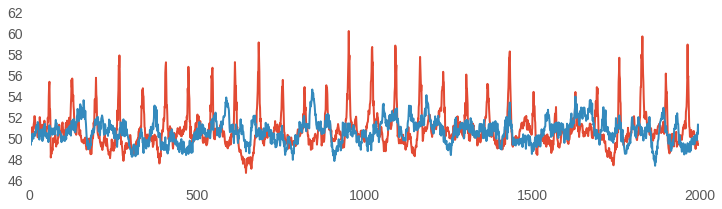

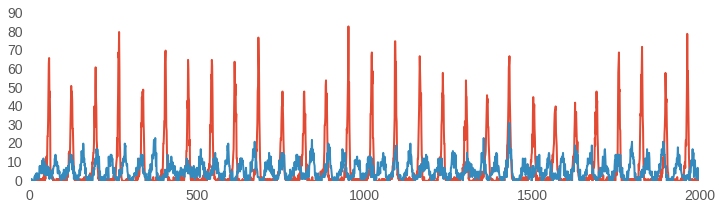

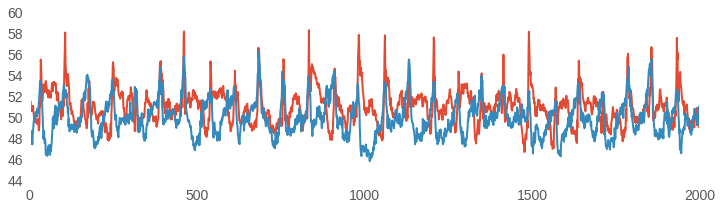

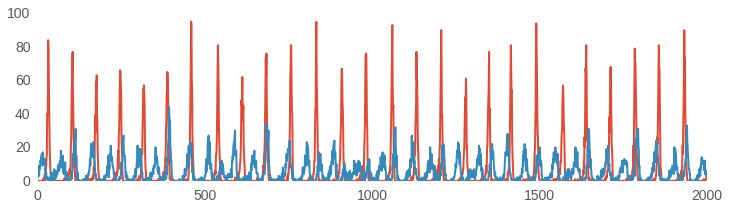

In [12]:
sG = 20
both = False
tauv = 15
T= 16000
N = 1000
k = 0
filename = "Switch41-both-%s_tauv-%d_sg-%d_N-%d_input-%s_T-%d_k-%d" % (str(both), tauv,sG, N, 'noise', T, k)
a = np.load(filename)
start = 100
d = 2000
plt.figure(figsize=(12,3))

print(a['g1N1'][-1])
print(a['g1N2'][-1])
print(fourier(a['i1N1'][start:start+d]))
print(fourier(a['i1N2'][start:start+d]))
print(fourier(a['i1N1'][-d:]))
print(fourier(a['i1N2'][-d:]))
print('*****fourier from psth******')
print(fourier(a['vvmN1'][start:start+d]))
print(fourier(a['vvmN2'][start:start+d]))
print(fourier(a['vvmN1'][-d:]))
print(fourier(a['vvmN2'][-d:]))

plt.figure(figsize=(12,3))
plt.plot(a['i1N1'][start:start+d])
plt.plot(a['i1N2'][start:start+d])


plt.figure(figsize=(12,3))

plt.plot(a['vvmN1'][start:start+d])
plt.plot(a['vvmN2'][start:start+d])

plt.figure(figsize=(12,3))
plt.plot(a['i1N1'][-d:])
plt.plot(a['i1N2'][-d:])
plt.figure(figsize=(12,3))
plt.plot(a['vvmN1'][-d:])
plt.plot(a['vvmN2'][-d:])

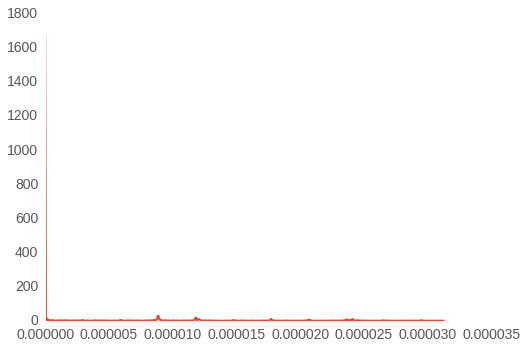

In [27]:
import scipy
y = a['i1N1']
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fig, ax = plt.subplots()
r = 2.0/N * np.abs(yf[:N//2])
ax.plot(xf, r)
plt.show()

In [28]:
print(np.argmax(r[1:]))
r[np.argmax(r[1:])+1]
# print(r[169])

140


29.508512

135

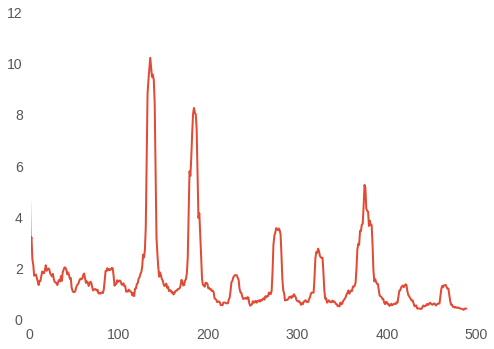

In [29]:
plt.plot(movingaverage(r[1:], 10))
np.argmax(movingaverage(r[1:], 10))

In [80]:
disp = False
tauv = 50
sG = 100
N = 2000
T= 2000
both=True

### input 1: apple
gpu = TfConnEvolveNet(N=N, T=T, disp=False, tauv=tauv, sG=sG, device='/gpu:0',
                 both=both, spikeMonitor=False, startPlast=10)

gpu.spikeMonitor = False
gpu.showProgress = False

gpu.input = np.zeros(T)
gpu.connectTime = 1000
gpu.FACT = 10**(-10)
gpu.initWGap = -1
gpu.g1 = 3.5
gpu.g2 = 4.5
gpu.disp = False
gpu.runTFSimul()



18.28



4.53274976462 5.83072286099 2.58703832515


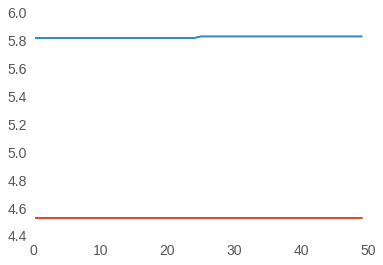

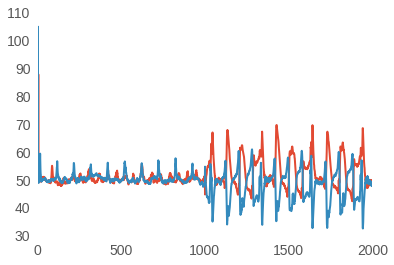

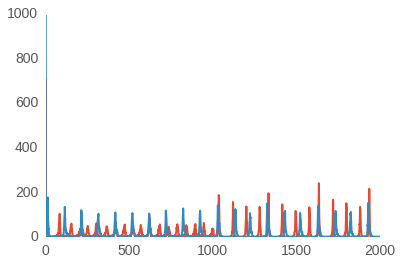

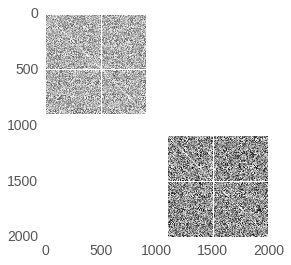

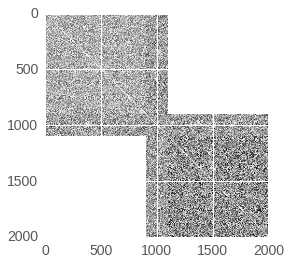

In [82]:
# plt.figure(figsize=(10,10))
# plt.imshow(gpu.raster.transpose())
# plt.savefig(DIRECTORY + 'raster-N_%d-sg_%d-tauv_%d.png'%( N, sG, tauv))
plt.figure()
plt.plot(gpu.gammaN1)
plt.plot(gpu.gammaN2)
plt.figure()
plt.plot(gpu.i1)
plt.plot(gpu.i2)

plt.figure()
plt.plot(gpu.vvmN1)
plt.plot(gpu.vvmN2)
print(np.mean(gpu.gammaN1), np.mean(gpu.gammaN2), np.mean(gpu.gammaNS))
plt.figure()
plt.imshow(gpu.w0)
plt.figure()
plt.imshow(gpu.wE)

In [5]:
np.all(gpu.w0==gpu.wE)

False

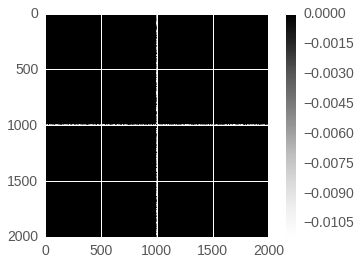

In [79]:
plt.imshow(gpu.w0-gpu.wE)
plt.colorbar()